# Optimise the trim of an aircraft

This is a benchmark problem that originally appeared in ...

https://www.osti.gov/biblio/6449249

<img src="../../imgs/glider.jpg" alt="A glider in the french alps." width="600" height="400">

Very important! Tutorial with trajectory optimisation problems.

https://vanderbei.princeton.edu/tex/trajopt/trajopt.pdf

In [1]:
# https://vanderbei.princeton.edu/ampl/nlmodels/cute/aircrftb.mod
# https://vanderbei.princeton.edu/ampl/nlmodels//cute/

# This is the AIRCRAFTB problem, where the constraints have been eliminated by fixing
# the last three variables. This can be solved as either a minimisation problem or a
# least squares problem. It makese sense to reformulate this to make the three control
# variables simply arguments, instead of elements of y, and then we can solve this with
# LM or so.
# It would actually be good to do this in this notebook, as an illustration of this
# principle. And it would also be good to show that this can be solved in an overblown
# way with an IPOPTLike solver that handles the equality constraints.
# But to test the IPOPT descent, it is not actually a good problem.

# # AMPL Model by Hande Y. Benson
# #
# # Copyright (C) 2001 Princeton University
# # All Rights Reserved
# #
# # Permission to use, copy, modify, and distribute this software and
# # its documentation for any purpose and without fee is hereby
# # granted, provided that the above copyright notice appear in all
# # copies and that the copyright notice and this
# # permission notice appear in all supporting documentation.

# #   Source: problem 9 in
# #   J.J. More',"A collection of nonlinear model problems"
# #   Proceedings of the AMS-SIAM Summer Seminar on the Computational
# #   Solution of Nonlinear Systems of Equations, Colorado, 1988.
# #   Argonne National Laboratory MCS-P60-0289, 1989.

# #   SIF input: Ph. Toint, Dec 1989.

# #   classification SXR2-RN-8-0

# param m;
# param n;

# set N := 1..n;
# set M := 1..m;

# param A{M,N};
# var X{N};
# var AX{i in M} = sum{j in N} (A[i,j]*X[j]);

# var P1=(-0.727*X[2]*X[3])+(8.39*X[3]*X[4])-(684.4*X[4]*X[5])+(63.5*X[4]*X[2]);
# var P2 = (0.949*X[1]*X[3])+(0.173*X[1]*X[5]);
# var P3 = (-0.716*X[1]*X[2])-(1.578*X[1]*X[4])+(1.132*X[4]*X[2]);
# var P4 = -1*X[1]*X[5];
# var P5 = X[1]*X[4];

# minimize L2force:
# 	(AX[1]+P1)^2 +(AX[2]+P2)^2+(AX[3]+P3)^2+(AX[4]+P4)^2+(AX[5]+P5)^2;

# subject to elevator:
# 	X[6] = -0.05;

# subject to aileron:
# 	X[7] = 0.1;

# subject to rudder:
# 	X[8] = 0.0;

# data;
# param m := 5;
# param n := 8;

# param A:
# 	1	2	3	4	5	6	7	8:=
# 1	-3.933	0.107	0.126	0	-9.99	0	-45.83	-7.64
# 2	0	-0.987	0	-22.95	0	-28.37	0	0
# 3	0.002	0	-0.235	0	5.67	0	-0.921	-6.51
# 4	0	1.0	0	-1.0	0	-0.168	0	0
# 5	0	0	-1.0	0	-0.196	0	-0.0071	0;

# var X =
# 1 0
# 2 0
# 3 0
# 4 0
# 5 0
# 6 -0.05
# 7 0.1
# 8 0.0;


# solve;

# display X;

In [ ]:
# This problem could be solved more efficiently by doing a root find on the constraint
# functions, and setting the fixed variables as arguments to the new function.
# This seems like a much cleaner approach.

# # AMPL Model by Hande Y. Benson
# #
# # Copyright (C) 2001 Princeton University
# # All Rights Reserved
# #
# # Permission to use, copy, modify, and distribute this software and
# # its documentation for any purpose and without fee is hereby
# # granted, provided that the above copyright notice appear in all
# # copies and that the copyright notice and this
# # permission notice appear in all supporting documentation.

# #   Source: Problem 9 in
# #   J.J. More',"A collection of nonlinear model problems"
# #   Proceedings of the AMS-SIAM Summer Seminar on the Computational
# #   Solution of Nonlinear Systems of Equations, Colorado, 1988.
# #   Argonne National Laboratory MCS-P60-0289, 1989.

# #   SIF input: Ph. Toint, Dec 1989.

# #   classification NOR2-RN-8-5

# var rollrate := 0.0;
# var pitchrat := 0.0;
# var yawrate := 0.0;
# var attckang := 0.0;
# var sslipang := 0.0;
# var elevator := 0.0;
# var aileron := 0.0;
# var rudderdf := 0.0;

# minimize f: 0;

# subject to cons1:
# (-3.933*rollrate+0.107*pitchrat+0.126*yawrate-9.99*sslipang-45.83*aileron
#   -7.64*rudderdf-0.727*pitchrat*yawrate+
# 8.39*yawrate*attckang-684.4*attckang*sslipang+63.5*pitchrat*attckang) = 0;
# subject to cons2:
# (-0.987*pitchrat-22.95*attckang-28.37*elevator+0.949*rollrate*yawrate
#   +0.173*rollrate*sslipang) = 0;
# subject to cons3:
# (0.002*rollrate-0.235*yawrate+5.67*sslipang-0.921*aileron-6.51*rudderdf
#   -0.716*rollrate*pitchrat-1.578*rollrate*attckang+1.132*pitchrat*attckang) = 0;
# subject to cons4:
# (pitchrat- attckang-1.168*elevator-rollrate*sslipang) = 0;
# subject to cons5:
# (-yawrate-0.196*sslipang-0.0071*aileron+rollrate*attckang) = 0;

# fix elevator := 0.1;
# fix aileron := 0.0;
# fix rudderdf := 0.0;

# solve;
# display f;
# display rollrate, pitchrat, yawrate, attckang, sslipang, elevator, aileron, rudderdf;

In [3]:
import equinox.internal as eqxi
import jax
import jax.numpy as jnp
import jax.tree_util as jtu
import lineax as lx
import matplotlib.pyplot as plt
import pandas as pd


jax.config.update("jax_enable_x64", True)

In [4]:
linear_terms = jnp.array(
    [
        [-3.933, 0.107, 0.126, 0, -9.99, 0, -45.83, -7.64],
        [0, -0.987, 0.0, -22.95, 0.0, -28.37, 0.0, 0.0],
        [0.002, 0, -0.235, 0.0, 5.67, 0.0, -0.921, -6.51],
        [0, 1.0, 0, -1.0, 0, -0.168, 0, 0],
        [0, 0, -1.0, 0, -0.196, 0, -0.0071, 0],
    ]
)


def aircraftb(y, linear_terms):
    """Computes the objective function for the aircraft problem. This is a sum of
    squares, which are composed of linear and nonlinear terms. We keep the linear terms
    in a matrix, and pass it as an argument to this function. The nonlinear terms are
    computed below.
    """

    # Calculate the P terms
    x1, x2, x3, x4, x5, *_ = y
    p1 = (-0.727 * x1 * x2) + (8.39 * x3 * x4) - (684.4 * x4 * x5) + (63.5 * x4 * x2)
    p2 = (0.949 * x1 * x3) + (0.173 * x1 * x5)
    p3 = (-0.716 * x1 * x2) - (1.578 * x1 * x4) + (1.132 * x4 * x2)
    p4 = -1 * x1 * x5
    p5 = x1 * x4
    ps = jnp.array([p1, p2, p3, p4, p5])

    squares = (linear_terms @ y + ps) ** 2
    return 0.001 * jnp.sum(squares)


def constraintb(y):
    """Defines fixed values for the elevator, aileron, and rudder. All constraints are
    formulated to be satisfied when they take the value 0.0, and all constraints are
    equality constraints.
    """
    *_, elevator, aileron, rudder = y
    c1 = elevator + 0.05  # the nose of our aircraft points slightly down
    c2 = aileron - 0.1  # we're turning left - right wing goes up
    c3 = rudder  # we're not correcting the yaw here
    return jnp.array([c1, c2, c3])

In [5]:
y0 = jnp.array([0.0, 0.0, 0.0, 0.0, 0.0, -0.05, 0.1, 0.0])
aircraftb(y0, linear_terms), constraintb(y0)

(Array(0.02302458, dtype=float64), Array([0., 0., 0.], dtype=float64))

In [6]:
hessian = jax.hessian(aircraftb)(y0, linear_terms)

In [7]:
jac = jax.jacfwd(constraintb)(y0)

In [8]:
hessian, jac

(Array([[ 3.09369860e-02,  5.95390720e-03,  1.70025700e-03,
          2.89247600e-04,  7.90780210e-02,  0.00000000e+00,
          3.60495096e-01,  6.00702000e-02],
        [ 5.95390720e-03,  3.97123600e-03,  2.69640000e-05,
         -5.38946214e-01, -2.13786000e-03,  5.56663800e-02,
         -9.80762000e-03, -1.63496000e-03],
        [ 1.70025700e-03,  2.69640000e-05,  2.14220200e-03,
         -7.69027400e-02, -4.79038000e-03,  0.00000000e+00,
         -1.11020900e-02,  1.13442000e-03],
        [ 2.89247600e-04, -5.38946214e-01, -7.69027400e-02,
          1.05540500e+00,  6.27321040e+00,  1.30251900e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 7.90780210e-02, -2.13786000e-03, -4.79038000e-03,
          6.27321040e+00,  2.63974832e-01,  0.00000000e+00,
          9.05242043e-01,  7.88238000e-02],
        [ 0.00000000e+00,  5.56663800e-02,  0.00000000e+00,
          1.30251900e+00,  0.00000000e+00,  1.60977025e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 3.6049

In [9]:
hessian.shape, jac.shape

((8, 8), (3, 8))

In [10]:
def make_kkt(hessian, jac, input_structure):
    hessian = lx.MatrixLinearOperator(hessian)
    jac = lx.MatrixLinearOperator(jac)

    def kkt(inputs):
        y, dual = inputs
        y_step = hessian.mv(y) + jac.transpose().mv(dual)
        dual_step = jac.mv(y)
        return y_step + 1e-2 * y, dual_step - 1e-4 * dual

    return lx.FunctionLinearOperator(kkt, input_structure)


initial_duals = jnp.zeros(3)
out_structure = jax.eval_shape(lambda: (y0, initial_duals))
kkt_operator = make_kkt(hessian, jac, out_structure)


def make_vector(y, dual, linear_terms):
    grad_ = jax.grad(aircraftb)(y, linear_terms)
    dual_ = jac.T @ dual
    return (-grad_ - dual_, -constraintb(y))


vector = make_vector(y0, initial_duals, linear_terms)

solution = lx.linear_solve(kkt_operator, vector, solver=lx.SVD())
solution.value

(Array([-1.11839747e+00,  6.42604588e-01,  2.55300852e-01, -2.94240591e-03,
         6.92692565e-02,  4.85417182e-06, -7.06089182e-06, -8.73885995e-07],      dtype=float64),
 Array([ 0.04854172, -0.07060892, -0.00873886], dtype=float64))

In [11]:
# eqx.partition(kkt_operator, eqx.is_array)

In [12]:
from optimistix import RESULTS
from optimistix._misc import filter_cond, tree_full_like


def _regularise(operator, upper_delta, lower_delta):
    (primal_struct, dual_struct), _ = operator.input_structure
    values = (
        tree_full_like(primal_struct, upper_delta),
        tree_full_like(dual_struct, -lower_delta),
    )
    regulariser = lx.DiagonalLinearOperator(values)
    return operator + regulariser


def correct_inertia(kkt_operator):
    """Perform adaptive inertia correction of the KKT operator. Regularises the upper
    left and lower right blocks of the operator, where the lower right is regularised
    only if zero eigenvalues are present in the first factorisation of the operator.
    The upper left block (Hessian of the Lagrangian) is regularised with progressively
    larger values, until the inertia is corrected or a tolerance has been exceeded.
    """
    (primal_struct, dual_struct), _ = kkt_operator.input_structure
    num_primals = primal_struct.size
    num_duals = dual_struct.size

    eigenvalues = jnp.linalg.eigvalsh(kkt_operator.as_matrix())
    check_positives = jnp.sum(eigenvalues > 0.0) < num_primals
    check_negatives = jnp.sum(eigenvalues < 0.0) < num_duals
    requires_correction = check_positives | check_negatives
    upper_delta = jnp.where(requires_correction, 1e-4, 0.0)

    has_zeros = jnp.any(eigenvalues == 0.0)
    lower_delta = jnp.where(has_zeros, 1e-2, 0.0)  # Regularise lower right

    def correct(args):
        upper_delta, lower_delta = args

        def cond_fun(carry):
            upper_delta, lower_delta = carry
            corrected_operator = _regularise(kkt_operator, upper_delta, lower_delta)

            eigenvalues = jnp.linalg.eigvalsh(corrected_operator.as_matrix())
            check_positives = jnp.sum(eigenvalues > 0.0) < num_primals
            check_negatives = jnp.sum(eigenvalues < 0.0) < num_duals
            requires_correction = check_positives | check_negatives
            return requires_correction

        def body_fun(carry):
            upper_delta, lower_delta = carry
            return upper_delta * 8.0, lower_delta  # TODO schedule

        carry = (upper_delta, lower_delta)
        final_carry = eqxi.while_loop(
            cond_fun, body_fun, carry, kind="lax", max_steps=10
        )
        # TODO: RESULT: check if regularisation / factorisation has failed
        upper_delta, lower_delta = final_carry
        upper_delta = 1e3
        corrected_operator = _regularise(kkt_operator, upper_delta, lower_delta)
        return corrected_operator, RESULTS.successful

    def keep(args):
        del args  # No regularisation needed
        return _regularise(kkt_operator, 0.0, 0.0), RESULTS.successful

    args = (upper_delta, lower_delta)
    corrected_operator, result = filter_cond(requires_correction, correct, keep, args)

    return corrected_operator

In [13]:
count = 0

y = y0
recorded_ys = [y]
initial_duals = jnp.zeros(3)
duals = initial_duals
recorded_duals = [duals]
input_structure = jax.eval_shape(lambda: (y0, initial_duals))

singular_values = []
num_steps = 400
while count < num_steps - 1:
    hessian = jax.hessian(aircraftb)(y, linear_terms)
    jac = jax.jacfwd(constraintb)(y)
    kkt_operator = make_kkt(hessian, jac, input_structure)
    kkt_operator = correct_inertia(kkt_operator)

    vector = make_vector(y, duals, linear_terms)
    solution = lx.linear_solve(kkt_operator, vector, solver=lx.SVD())
    svd, result = solution.state
    u, s, v = svd
    singular_values.append(s)

    y, duals = jtu.tree_map(lambda x: 0.25 * x, solution.value)
    recorded_ys.append(y)
    recorded_duals.append(duals)

    count += 1

recorded_ys = jnp.array(recorded_ys)
recorded_duals = jnp.array(recorded_duals)

singular_values = jnp.array(singular_values)

function_values = jax.vmap(aircraftb, in_axes=(0, None))(recorded_ys, linear_terms)
constraint_values = jax.vmap(constraintb)(recorded_ys)

Text(0, 0.5, 'Constraint values')

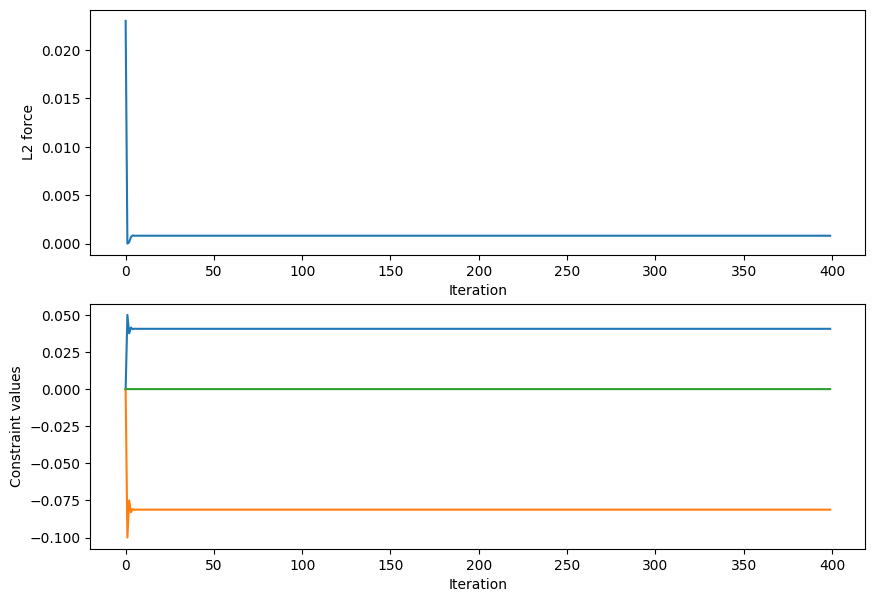

In [14]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 7))

ax1.plot(jnp.arange(num_steps), function_values, label="log(L2 force)")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("L2 force")

ax2.plot(jnp.arange(num_steps), constraint_values, label="Constraints")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Constraint values")

Text(0.5, 1.0, 'Dual values')

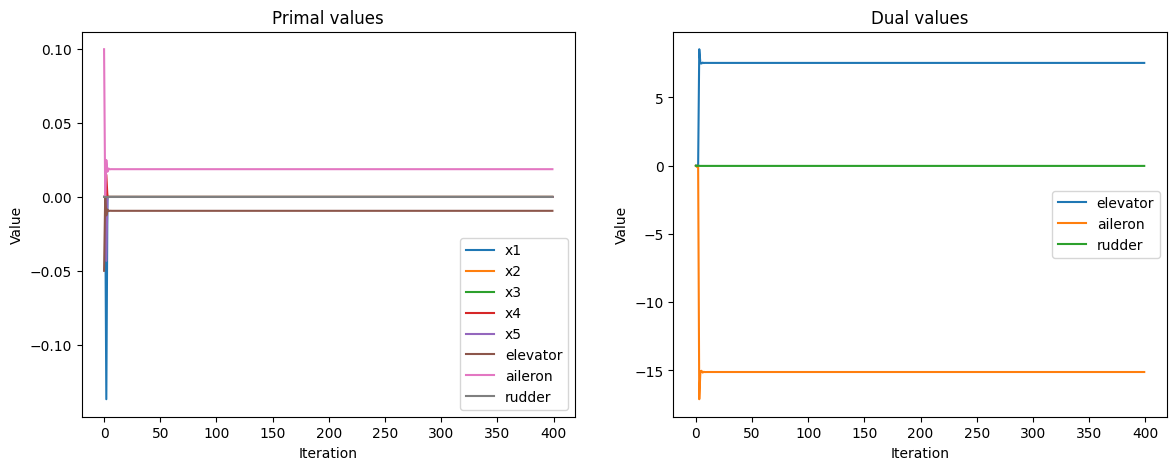

In [15]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 5))

labels = ["x1", "x2", "x3", "x4", "x5", "elevator", "aileron", "rudder"]
df = pd.DataFrame(dict(zip(labels, recorded_ys.T)))
df.plot(ax=ax1)
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Value")
ax1.set_title("Primal values")

df = pd.DataFrame(dict(zip(["elevator", "aileron", "rudder"], recorded_duals.T)))
df.plot(ax=ax2)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Value")
ax2.set_title("Dual values")

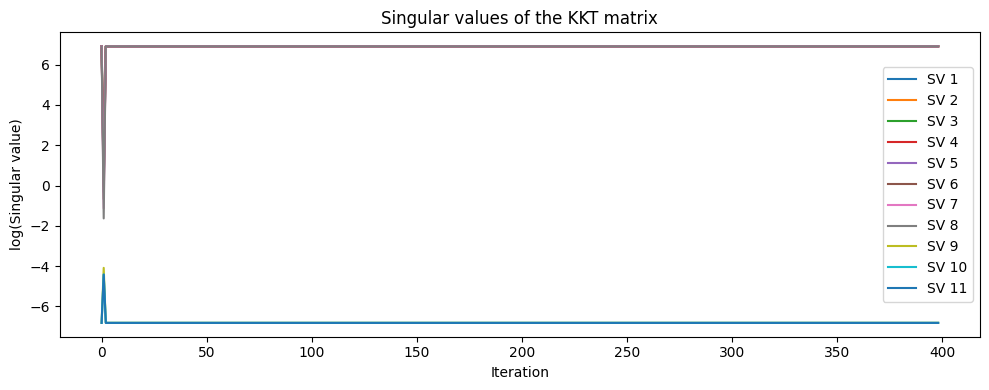

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
labels = [f"SV {i}" for i in range(1, 12)]
pd.DataFrame(dict(zip(labels, jnp.log(singular_values.T)))).plot(ax=ax)
# labels = [f"EV {i}" for i in range(1, 12)]

ax.set_xlabel("Iteration")
ax.set_ylabel("log(Singular value)")
ax.set_title("Singular values of the KKT matrix")

fig.tight_layout()